# WeatherPy

- Module 6 Challenge: "In this deliverable, you'll create a Python script to visualize the weather of over 500 cities of varying distances from the equator. You'll use the citipy Python libraryLinks to an external site., the OpenWeatherMap APILinks to an external site., and your problem-solving skills to create a representative model of weather across cities."
  
- The following notebook was developed from the provided starter code.

- I developed a function to create the regression scatterplots with a single call of a function.

- Below each regression plot, I added a discussion about the linear relationship between the variables.
  
- Student name: Steph Abegg 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate Random Geographic Coordinates and a List of Cities by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)  #size=1500
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)  #size=1500
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
# https://api.openweathermap.org/data/2.5/weather?lat=23.1754766&lon=174.97903133&appid={weather_api_key}
# https://api.openweathermap.org/data/2.5/weather?q=London,uk&APPID={weather_api_key}
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "?q=" + city  + "&appid=" + weather_api_key

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max'] - 273.15 # temp given in Kelvins, convert to Celcius
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | port saint john's
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | udachny
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | acarau
Processing Record 8 of Set 1 | marquette
Processing Record 9 of Set 1 | vorgashor
Processing Record 10 of Set 1 | antonio enes
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | pocone
Processing Record 13 of Set 1 | valparaiso
Processing Record 14 of Set 1 | saint-francois
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | kujuvar
City not found. Skipping...
Processing Record 18 of Set 1 | pisco
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | tazovsky
Processing Record 21 of

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(data = city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,3.81,60,0,8.23,AR,1721705991
1,port saint john's,-31.6229,29.5448,12.76,78,6,2.98,ZA,1721705992
2,puerto natales,-51.7236,-72.4875,3.52,93,100,2.02,CL,1721705994
3,udachny,66.4167,112.4000,16.70,36,36,4.13,RU,1721705995
4,bilibino,68.0546,166.4372,26.15,48,46,7.17,RU,1721705997


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
print(city_data_df.count())
city_data_df.head()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,3.81,60,0,8.23,AR,1721705991
1,port saint john's,-31.6229,29.5448,12.76,78,6,2.98,ZA,1721705992
2,puerto natales,-51.7236,-72.4875,3.52,93,100,2.02,CL,1721705994
3,udachny,66.4167,112.4000,16.70,36,36,4.13,RU,1721705995
4,bilibino,68.0546,166.4372,26.15,48,46,7.17,RU,1721705997


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

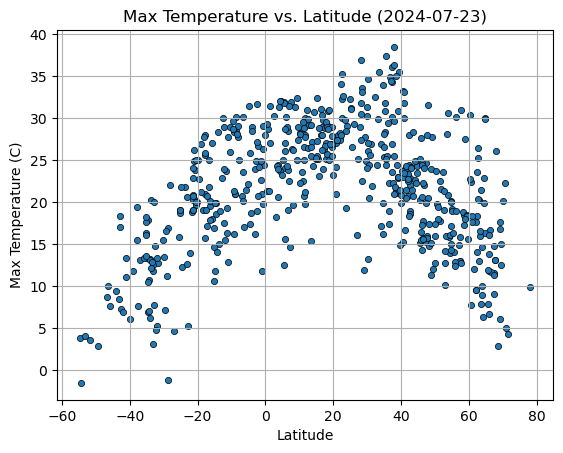

In [3]:
# Build scatter plot for latitude vs. temperature

# Get date of data to display on scatter plots
unix_timestamp  = city_data_df["Date"][0]
utc_time = time.gmtime(unix_timestamp)

# Scatterplot
scatter_temp_vs_lat = city_data_df.plot(kind = 'scatter',
                                        x = "Lat",
                                        y = "Max Temp", 
                                        xlabel = "Latitude",
                                        ylabel = "Max Temperature (C)",
                                        title = "Max Temperature vs. Latitude (" + time.strftime("%Y-%m-%d", utc_time) + ")",
                                        grid = True,
                                        edgecolors= "black",
                                        linewidths = 0.5
                                       )

# Save the figure
plt.savefig("output_data/Fig1_maxtemp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

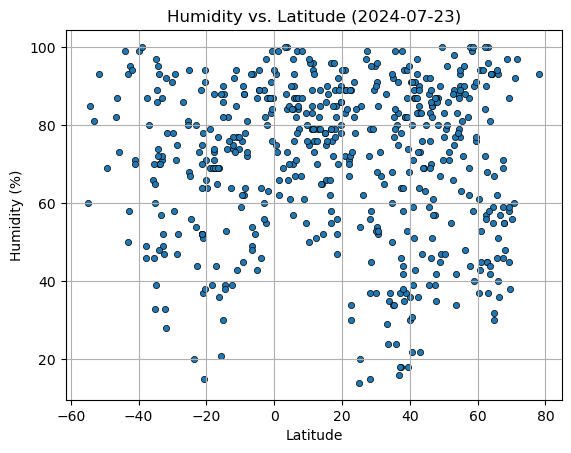

In [4]:
# Build the scatter plots for latitude vs. humidity
scatter_temp_vs_lat = city_data_df.plot(kind = 'scatter',
                                        x = "Lat",
                                        y = "Humidity", 
                                        xlabel = "Latitude",
                                        ylabel = "Humidity (%)",
                                        title = "Humidity vs. Latitude (" + time.strftime("%Y-%m-%d", utc_time) + ")",
                                        grid = True,
                                        edgecolors= "black",
                                        linewidths = 0.5
                                       )

# Save the figure
plt.savefig("output_data/Fig2_humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

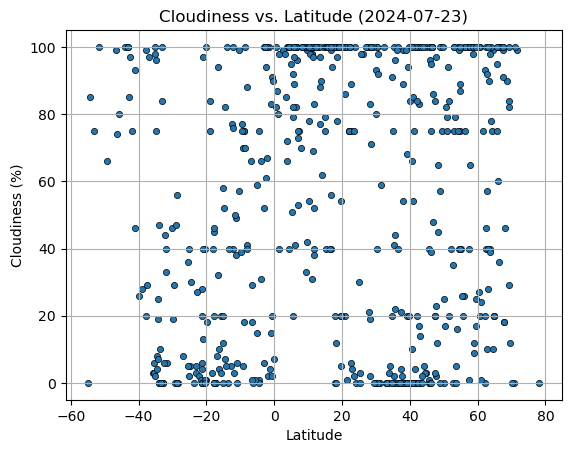

In [5]:
# Build the scatter plots for latitude vs. cloudiness
scatter_clouds_vs_lat = city_data_df.plot(kind = 'scatter',
                                        x = "Lat",
                                        y = "Cloudiness", 
                                        xlabel = "Latitude",
                                        ylabel = "Cloudiness (%)",
                                        title = "Cloudiness vs. Latitude (" + time.strftime("%Y-%m-%d", utc_time) + ")",
                                        grid = True,
                                        edgecolors= "black",
                                        linewidths = 0.5
                                        )

# Save the figure
plt.savefig("output_data/Fig3_cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

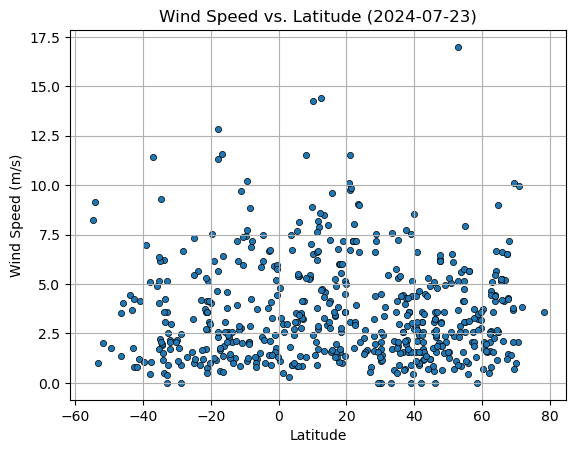

In [6]:
# Build the scatter plots for latitude vs. wind speed
scatter_wind_vs_lat = city_data_df.plot(kind = 'scatter',
                                        x = "Lat",
                                        y = "Wind Speed", 
                                        xlabel = "Latitude",
                                        ylabel = "Wind Speed (m/s)",
                                        title = "Wind Speed vs. Latitude (" + time.strftime("%Y-%m-%d", utc_time) + ")",
                                        grid = True,
                                        edgecolors= "black",
                                        linewidths = 0.5
                                       )

# Save the figure
plt.savefig("output_data/Fig4_wind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [35]:
# Define a function to create Linear Regression Plots
def lin_reg_plot(y_column_name, df, hemisphere, date, eqn_position="top"):

    # Create y-axis label
    if y_column_name == "Max Temp":
        ylabel = "Max Temperature (C)"
    elif y_column_name == "Humidity":
        ylabel = "Humidity (%)"
    elif y_column_name == "Cloudiness":
        ylabel = "Cloudiness (%)"
    elif y_column_name == "Wind Speed":
        ylabel = "Wind Speed (m/s)"
    else:
        return
    
    # Scatterplot
    scatterplot = df.plot(kind = 'scatter',
                          x = "Lat",
                          y = y_column_name, 
                          xlabel = "Latitude",
                          ylabel = ylabel,
                          title = ylabel + " vs. Latitude, "+ hemisphere + " Hemisphere (" + time.strftime("%Y-%m-%d", date) + ")",
                          grid = False,
                          edgecolors = "black",
                          linewidths = 0.5
                         )
    
    # Find regression model using linregress
    xdata = df["Lat"]
    ydata = df[y_column_name]
    slope, intercept, rvalue, pvalue, stderr = linregress(xdata, ydata) 
    r_squared = rvalue*rvalue # The square of rvalue is equal to the coefficient of determination
    ylinreg = slope*xdata + intercept # regression values
    
    # Plot regression model and r^2 value on scatterplot
    if eqn_position == "bottom": 
        eqn_position_1 = [.01*max(xdata)+.99*min(xdata),.1*max(ydata)+.9*min(ydata)]
        eqn_position_2 = [.01*max(xdata)+.99*min(xdata),.01*max(ydata)+.99*min(ydata)]
    else: # eqn_position == "top" or anything else
        eqn_position_1 = [.01*max(xdata)+.99*min(xdata),.95*max(ydata)+.05*min(ydata)]
        eqn_position_2 = [.01*max(xdata)+.99*min(xdata),.85*max(ydata)+.15*min(ydata)]
        
    scatterplot.plot(xdata, ylinreg, '-r')
    scatterplot.text(eqn_position_1[0], eqn_position_1[1],f'y = {slope:0.2f}x + {intercept:0.2f}', fontsize = 14, color='red')
    scatterplot.text(eqn_position_2[0], eqn_position_2[1],'$r^2 = %0.2f$'% r_squared, fontsize = 14, color='red')
    print(f"The r^2-value between {ylabel} and Latitude in the {hemisphere} Hemisphere is: {r_squared:0.2f}.")


In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,udachny,66.4167,112.4000,16.70,36,36,4.13,RU,1721705995
4,bilibino,68.0546,166.4372,26.15,48,46,7.17,RU,1721705997
6,marquette,46.5333,-87.6335,15.75,85,100,2.32,US,1721705999
7,vorgashor,67.5833,63.9500,11.49,69,99,1.47,RU,1721706001
12,saint-francois,46.4154,3.9054,17.69,85,100,1.54,FR,1721706007


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,3.81,60,0,8.23,AR,1721705991
1,port saint john's,-31.6229,29.5448,12.76,78,6,2.98,ZA,1721705992
2,puerto natales,-51.7236,-72.4875,3.52,93,100,2.02,CL,1721705994
5,acarau,-2.8856,-40.1200,24.93,89,6,6.68,BR,1721705998
8,antonio enes,-16.2325,39.9086,19.49,69,10,1.89,MZ,1721706002


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value between Max Temperature (C) and Latitude in the Northern Hemisphere is: 0.34.


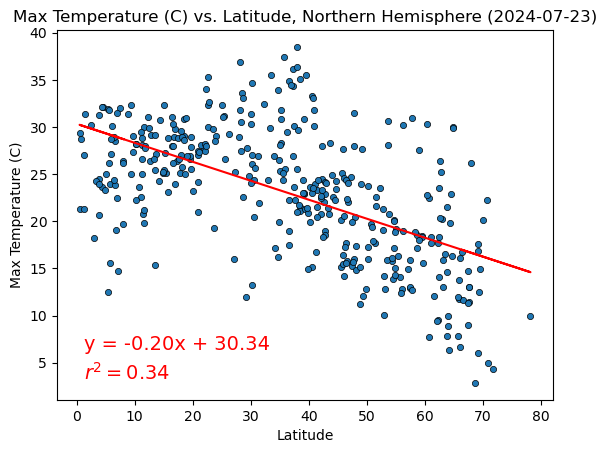

In [38]:
# Linear regression on Northern Hemisphere
# Using lin_reg_plot function defined above
lin_reg_plot(y_column_name="Max Temp", df=northern_hemi_df, hemisphere="Northern", date=utc_time, eqn_position="bottom")
plt.savefig("output_data/Fig5_maxtemp_nh_reg.png")


The r^2-value between Max Temperature (C) and Latitude in the Southern Hemisphere is: 0.52.


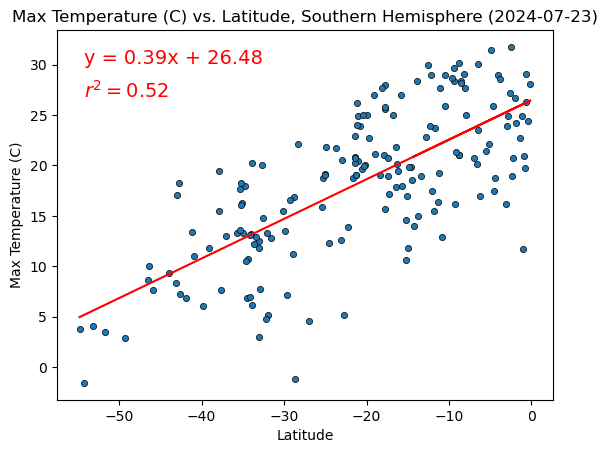

In [39]:
# Linear regression on Southern Hemisphere
# Using lin_reg_plot function defined above
lin_reg_plot(y_column_name="Max Temp", df=southern_hemi_df, hemisphere="Southern", date=utc_time, eqn_position="top")
plt.savefig("output_data/Fig6_maxtemp_sh_reg.png")


**Discussion about the linear relationship between Maximum Temperature and Latitude:** 

In both the Northern Hemisphere and the Southern Hemisphere, the temperature decreases moving to latitudes further from the equator (larger magnitude latitude) and increase moving to latitudes closer to the equator (smaller magnitude latitude). The trend is generally linear. The r^2 value in the Southern Hemisphere is around 0.5 (r>0.7), indicating a strong linear relationship. The r^2 value in the Northern Hemisphere is around 0.3 (0.5<r<0.7), indicating a moderate linear relationship. Also, the maximum temperatures are higher in the Northern Hemisphere than in the Southern, peaking around latitudes between 20-50 degrees. These observations are likely related to the distribution of land and water masses. There is more water overall in the Southern Hemisphere (and hence more cities close to large bodies of water) and more land overall in the Northern Hemisphere (and hence more cities further from large bodies of water), particularly concentrated in the latitudes between 20-50 degrees (see image below showing the distribution of land by latitude). Water leads to less temperature fluctuation (and hence less scatter and a more consistent trend in the data) while land leads to more temperature fluctuation (and hence more scatter and a less consistent trend in the data). The high maxumum tempeartueres in the Northern Hemisphere over the same latitudes as large land masses suggests that maximum temperatures tend to be higher over land (and hence cities far from water) than water (and hence cities closer to water). (One would also suspect a similiar effect for minimum tempeartures, i.e., that minimum temperatures are lower over land than water). 

In [40]:
# import image module
from IPython.display import Image 
# get the image 
Image(url="land_by_latitude.png", width=300, height=300)
# Reference: https://www.google.com/url?sa=i&url=https%3A%2F%2Fandywoodruff.com%2Fblog%2Fland-by-latitude-and-longitude-or-a-pile-of-continents%2F&psig=AOvVaw2JmKCGe8O9cbhWmhmExi0_&ust=1721242732215000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCKDctf-erIcDFQAAAAAdAAAAABAE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value between Humidity (%) and Latitude in the Northern Hemisphere is: 0.03.


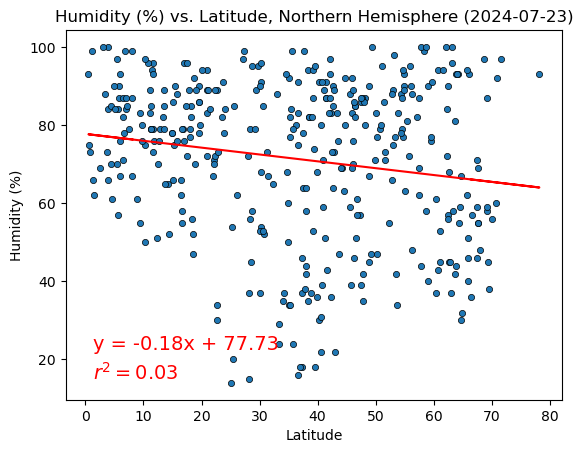

In [41]:
# Linear regression on Northern Hemisphere
# Using lin_reg_plot function defined above
lin_reg_plot(y_column_name="Humidity", df=northern_hemi_df, hemisphere="Northern", date=utc_time, eqn_position="bottom")
plt.savefig("output_data/Fig7_humidity_nh_reg.png")


The r^2-value between Humidity (%) and Latitude in the Southern Hemisphere is: 0.00.


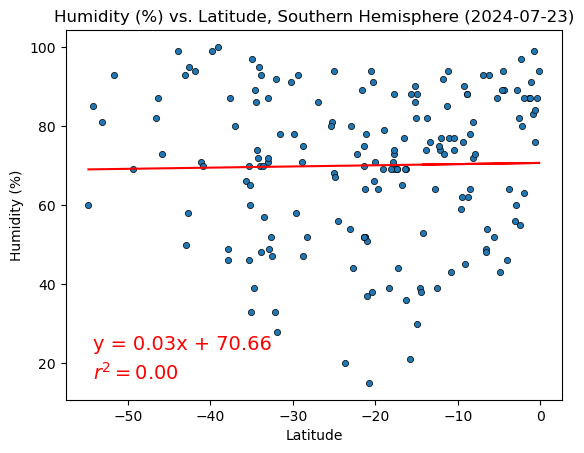

In [42]:
# Linear regression on Southern Hemisphere
# Using lin_reg_plot function defined above
lin_reg_plot(y_column_name="Humidity", df=southern_hemi_df, hemisphere="Southern", date=utc_time, eqn_position="bottom")
plt.savefig("output_data/Fig8_humidity_sh_reg.png")


**Discussion about the linear relationship between Humidity and Latitude:** 

THere is not a statistically discernible linear relationship between Humididty and Latitude, in either Hemisphere. The r^2 values are close to 0. The slopes of the regression lines are also close to zero. Considering the distribution of land masses shown in the "Land by Latitude" image above, it does seem that humidity has a greater range (from dry to humid) over areas with large land masses (and hence more cities further from large bodies of water) while it is mostly just humid over areas with less large land masses (and hence more cities closer to large bodies of water).

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value between Cloudiness (%) and Latitude in the Northern Hemisphere is: 0.04.


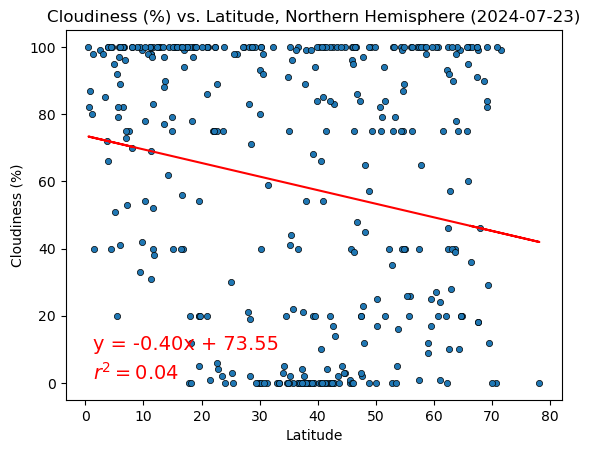

In [43]:
# Linear regression on Northern Hemisphere
# Using lin_reg_plot function defined above
lin_reg_plot(y_column_name="Cloudiness", df=northern_hemi_df, hemisphere="Northern", date=utc_time, eqn_position="bottom")
plt.savefig("output_data/Fig9_cloudiness_nh_reg.png")


The r^2-value between Cloudiness (%) and Latitude in the Southern Hemisphere is: 0.00.


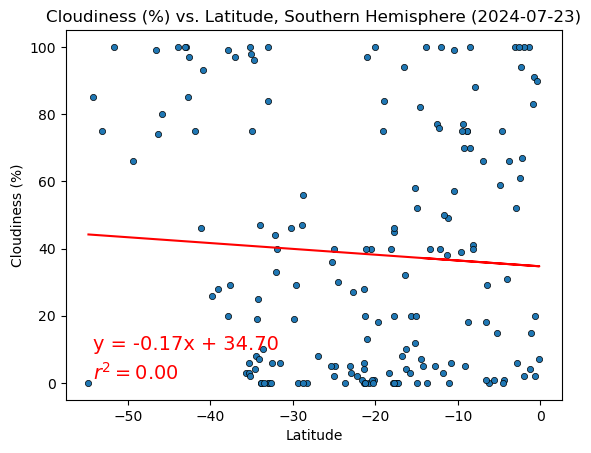

In [44]:
# Linear regression on Southern Hemisphere
# Using lin_reg_plot function defined above
lin_reg_plot(y_column_name="Cloudiness", df=southern_hemi_df, hemisphere="Southern", date=utc_time, eqn_position="bottom")
plt.savefig("output_data/Fig10_cloudiness_sh_reg.png")


**Discussion about the linear relationship between Cloudiness and Latitude:** 

There is not a statistically discernible linear relationship (or relationship at all) between Cloudiness and Latitude, in either Hemisphere. The r^2 values are close to 0. The slopes of the regression lines are also close to zero. It does not seem that the distribution of land masses and water masses has much to do with cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value between Wind Speed (m/s) and Latitude in the Northern Hemisphere is: 0.02.


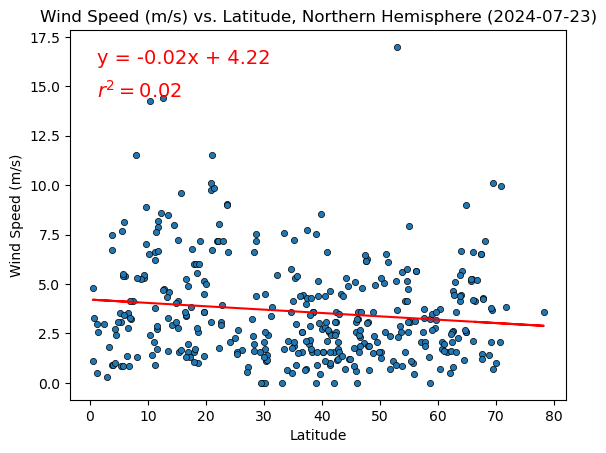

In [45]:
# Linear regression on Northern Hemisphere
# Using lin_reg_plot function defined above
lin_reg_plot(y_column_name="Wind Speed", df=northern_hemi_df, hemisphere="Northern", date=utc_time, eqn_position="top")
plt.savefig("output_data/Fig11_wind_nh_reg.png")


The r^2-value between Wind Speed (m/s) and Latitude in the Southern Hemisphere is: 0.00.


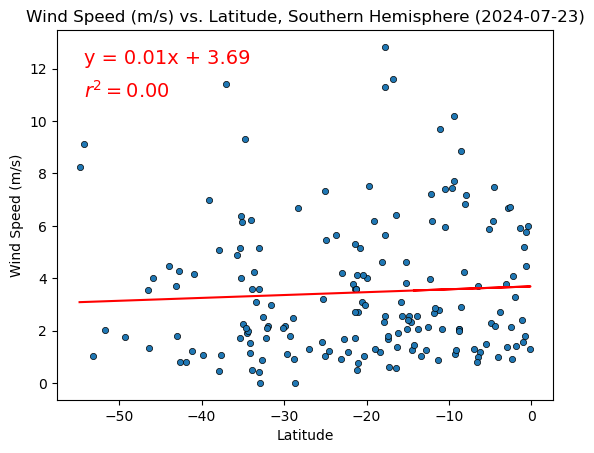

In [46]:
# Linear regression on Southern Hemisphere
# Using lin_reg_plot function defined above
lin_reg_plot(y_column_name="Wind Speed", df=southern_hemi_df, hemisphere="Southern", date=utc_time, eqn_position="top")
plt.savefig("output_data/Fig12_wind_sh_reg.png")


**Discussion about the linear relationship between Wind Speed and Latitude:** 

There is not a statistically discernible linear relationship (or relationship at all) between Wind Speed and Latitude, in either Hemisphere. The r^2 values are close to 0. The slopes of the regression lines are also close to zero. It does not seem that the distribution of land masses and water masses has much to do with wind speed.